In [33]:
import curvedsky as cs
import sys
import os
from matplotlib.pyplot import *
sys.path.append('../')
import numpy as np
from utils import cli
import pickle as pl

In [2]:
import healpy as hp

In [3]:
%load_ext autoreload
%autoreload 2
from quest_tn import RecoBase

In [4]:
clpp = RecoBase.from_ini('litebirdFG1_tn.ini')

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


An extra Mask is applied to data. Previous fsky is 0.80 and new fsky = 0.70


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


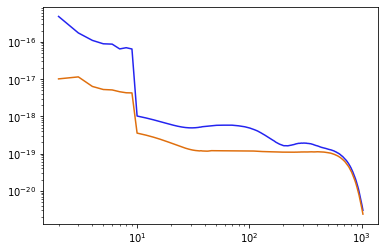

In [34]:
loglog(1/clpp.NL[0][0])
loglog(1/clpp.NL[1][0])

In [9]:
idx = 1

In [82]:
QU_org = clpp.get_sim(idx)*clpp.extra_mask

Maps with FG


In [83]:
qu_org = pl.load(open(os.path.join(clpp.map_dir+'/../MAP_noFG/',f"exp_sim_{idx:04d}.pkl"),'rb'))*clpp.extra_mask

In [81]:
#hp.mollview(QU_org[0,0,:])
#hp.mollview(qu_org[0,0,:])

In [29]:
#Elm, Blm = cs.utils.hp_map2alm_spin(clpp.nside,clpp.lmax,clpp.lmax,2,QU_org[0,0,:],QU_org[1,0,:])
#elm, blm = cs.utils.hp_map2alm_spin(clpp.nside,clpp.lmax,clpp.lmax,2,qu_org[0,0,:],qu_org[1,0,:])

In [30]:
#Elm[:10,:] = 0.
#Blm[:10,:] = 0.
#elm[:10,:] = 0.
#blm[:10,:] = 0.

In [76]:
#loglog(cs.utils.alm2cl(clpp.lmax,Elm))
#loglog(clpp.cl_len[1]*clpp.beam**2)

In [77]:
#NL = clpp.Tcmb**2/clpp.NL[:,0,:]
#nl = (2.16*np.pi/10800)**2*np.ones(clpp.lmax+1)
#lCl = clpp.cl_len[1:3,:]*clpp.Tcmb**2

In [78]:
#ylim(1e-7,1e-2)
#loglog(cs.utils.alm2cl(clpp.lmax,Blm)*clpp.Tcmb**2/clpp.fsky)
#loglog(cs.utils.alm2cl(clpp.lmax,blm)*clpp.Tcmb**2/clpp.fsky)
#loglog(clpp.cl_len[2]*clpp.beam**2*clpp.Tcmb**2)
#loglog(NL[1])
#loglog(nl)

In [79]:
#xlim(10,600)
#ylim(0,2)
#xscale('log')
#ylabel('BB w FG / BB wo FG')
#plot(clpp.L,(lCl[1]+NL[1])/(lCl[1]+nl))

In [80]:
#xlim(10,600)
#ylim(0,2)
#xscale('log')
#plot(clpp.L,(lCl[0]+NL[0])/(lCl[0]+nl))

In [32]:
#QU = np.reshape(cs.utils.hp_alm2map_spin(clpp.nside,clpp.lmax,clpp.lmax,2,Elm,Blm),(2,1,clpp.npix))
#qu = np.reshape(cs.utils.hp_alm2map_spin(clpp.nside,clpp.lmax,clpp.lmax,2,elm,blm),(2,1,clpp.npix))

In [92]:
Bl = np.reshape(clpp.beam,(1,clpp.lmax+1))
lcl = clpp.cl_len[1:3,:]
#lcl[:,:10] = 0.
invn = clpp.mask *clpp.extra_mask * (np.radians(clpp.sigma/60)/clpp.Tcmb)**-2
invN = np.reshape(np.array((invn,invn)),(2,1,clpp.npix))

In [93]:
E,B = cs.cninv.cnfilter_freq(
    2, 1, clpp.nside, clpp.lmax, lcl, Bl, invN, QU_org,
    chn=1, itns=[1000], eps=[1e-4], filter='', ro=10, stat='stat.txt'
)

In [94]:
e,b = cs.cninv.cnfilter_freq(
    2, 1, clpp.nside, clpp.lmax, lcl, Bl, invN, qu_org,
    chn=1, itns=[1000], eps=[1e-4], filter='', ro=10, stat='stat.txt'
)

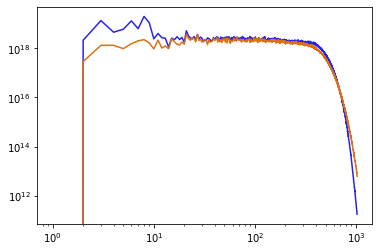

In [95]:
loglog(cs.utils.alm2cl(clpp.lmax,B))
loglog(cs.utils.alm2cl(clpp.lmax,b))
#loglog(1/clpp.cl_len[2,:])
#ylim(1e17,5e18)
#xlim(200,1024)

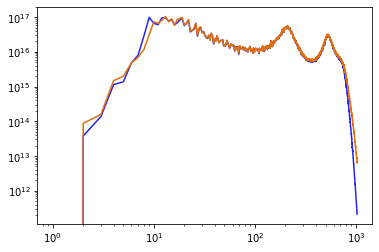

In [102]:
EE = cs.utils.alm2cl(clpp.lmax,E)
ee = cs.utils.alm2cl(clpp.lmax,e)
BB = cs.utils.alm2cl(clpp.lmax,B)
bb = cs.utils.alm2cl(clpp.lmax,b)
loglog(EE)
loglog(ee)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


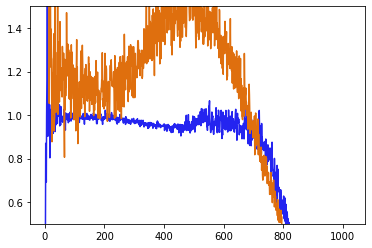

In [103]:
ylim(0.5,1.5)
plot(EE/ee)
plot(BB/bb)